## Categories: Food-Convenience-Drug Store & Restaurant

In [0]:
df2 = spark.read.format("delta").load("dbfs:/user/hive/warehouse/silver_d2")
df2.createOrReplaceTempView("df2")

In [0]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
food = [column for column in df2.columns if column.startswith("c_food")]
df_food = df2.select(food)
display(df_food)

c_food_convenience_drug_store_0_3m_trans,c_food_convenience_drug_store_0_3m_spend,c_food_convenience_drug_store_4_6m_trans,c_food_convenience_drug_store_4_6m_spend,c_food_convenience_drug_store_7_9m_trans,c_food_convenience_drug_store_7_9m_spend,c_food_convenience_drug_store_10_12m_trans,c_food_convenience_drug_store_10_12m_spend,c_food_convenience_drug_store_13_15m_trans,c_food_convenience_drug_store_13_15m_spend,c_food_convenience_drug_store_16_18m_trans,c_food_convenience_drug_store_16_18m_spend,c_food_convenience_drug_store_19_21m_trans,c_food_convenience_drug_store_19_21m_spend,c_food_convenience_drug_store_22_24m_trans,c_food_convenience_drug_store_22_24m_spend
6,15,5,28,7,18,6,24,4,12,7,27,6,10,6,12
7,26,7,30,7,26,7,27,6,19,7,29,7,25,7,27
7,33,7,17,5,9,7,17,7,19,7,23,7,22,6,18
6,24,7,24,5,15,3,8,5,9,3,6,5,10,4,12
7,24,7,21,7,24,7,27,7,20,7,24,7,26,7,27
0,0,4,9,0,0,1,1,3,3,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,23,7,23,5,13,7,24,7,21,7,17,7,32,7,26
6,24,1,8,1,2,5,8,3,4,2,3,1,1,3,10
6,20,6,13,7,22,7,24,7,25,7,20,7,24,7,30


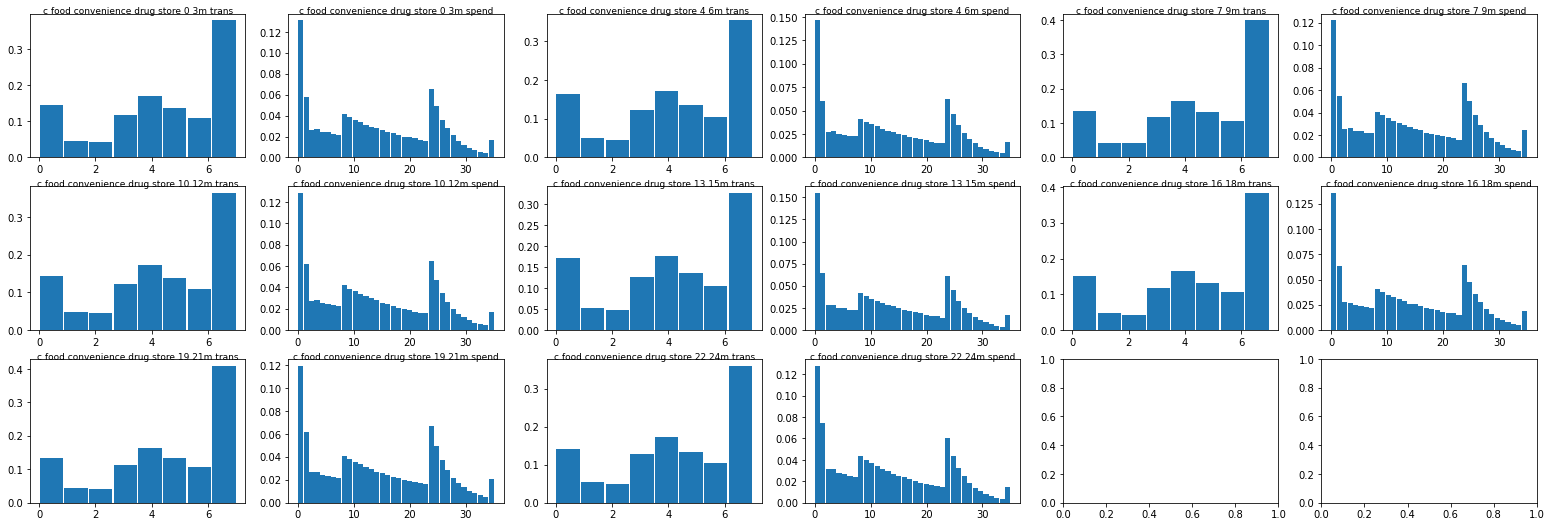

In [0]:
pd_samp = df_food.sample(0.1).toPandas()
feature_names = pd_samp.columns
feature_count = len(feature_names)
 
# determine required rows and columns for visualizations
column_count = 6
row_count = math.ceil(feature_count / column_count)
 
# configure figure layout
fig, ax = plt.subplots(row_count, column_count, figsize =(column_count * 4.5, row_count * 3))
 
# render distribution of each feature
for k in range(0,feature_count):
  
  # determine row & col position
  col = k % column_count
  row = int(k / column_count)
  
  # set figure at row & col position
  ax[row][col].hist(pd_samp[feature_names[k]], rwidth=0.95, bins= len(pd_samp[feature_names[k]].unique()), density=True)
  ax[row][col].text(x=0.5, y=1, s=feature_names[k].replace('_',' '), fontsize=9, ha='center',transform = ax[row][col].transAxes)
plt.show()

In [0]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation
import seaborn as sns
def corr_years(data, category, feat):
    columns = [c for c in data.columns if category in c and feat in c]
    tmp = data.select(columns)
    vector_col = "corr_features"
    assembler = VectorAssembler(inputCols=columns, 
                            outputCol=vector_col)
    vector = assembler.transform(tmp).select(vector_col)
    matrix = Correlation.corr(vector, vector_col)
    matrix = Correlation.corr(vector, vector_col).collect()[0][0]
    corrmatrix = matrix.toArray()
    mask = np.zeros_like(corrmatrix)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corrmatrix,  
                square=True,
                mask = mask,
                xticklabels=columns,
                yticklabels=columns,
               vmin=0)
    
    plt.show()
    return

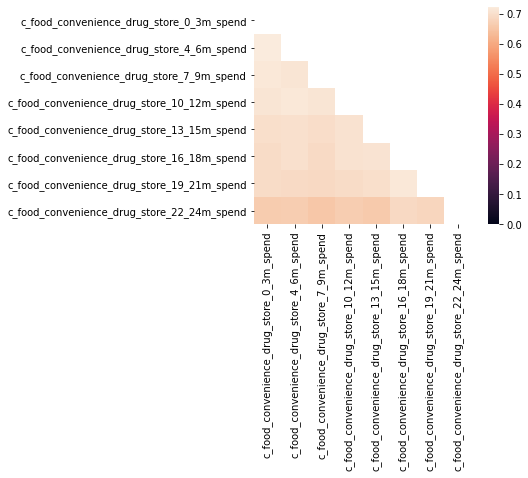

In [0]:
sample = df_food.sample(0.1).cache()
corr_years(sample, 'food', 'spend')

In [0]:
restaurant = [column for column in df2.columns if column.startswith("c_restaurant")]
df_restaurant = df2.select(restaurant)
display(df_restaurant)

c_restaurant_0_3m_trans,c_restaurant_0_3m_spend,c_restaurant_4_6m_trans,c_restaurant_4_6m_spend,c_restaurant_7_9m_trans,c_restaurant_7_9m_spend,c_restaurant_10_12m_trans,c_restaurant_10_12m_spend,c_restaurant_13_15m_trans,c_restaurant_13_15m_spend,c_restaurant_16_18m_trans,c_restaurant_16_18m_spend,c_restaurant_19_21m_trans,c_restaurant_19_21m_spend,c_restaurant_22_24m_trans,c_restaurant_22_24m_spend
5,10,7,23,5,12,7,19,4,5,5,11,7,13,7,14
7,14,7,25,7,15,7,18,6,8,7,21,7,21,7,23
6,19,5,13,6,20,6,12,5,7,4,9,7,22,4,12
5,10,6,21,4,10,2,2,4,6,4,7,4,6,4,6
7,18,7,18,7,19,7,22,7,19,7,22,7,16,7,25
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,26,7,21,7,17,7,24,7,21,7,23,7,21,7,24
5,8,7,15,6,8,7,11,5,8,7,12,7,25,7,14
7,21,6,12,7,15,7,19,7,19,7,20,7,24,7,24


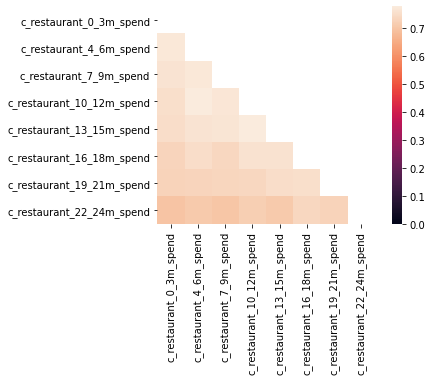

In [0]:
sample = df_restaurant.sample(0.1).cache()
corr_years(sample, 'restaurant', 'spend')

In [0]:
food_spend = [column for column in df2.columns if column.startswith("c_food") and column.endswith("spend")]
df_food_spend = df2.select(food_spend)
display(df_food_spend)

c_food_convenience_drug_store_0_3m_spend,c_food_convenience_drug_store_4_6m_spend,c_food_convenience_drug_store_7_9m_spend,c_food_convenience_drug_store_10_12m_spend,c_food_convenience_drug_store_13_15m_spend,c_food_convenience_drug_store_16_18m_spend,c_food_convenience_drug_store_19_21m_spend,c_food_convenience_drug_store_22_24m_spend
15,28,18,24,12,27,10,12
26,30,26,27,19,29,25,27
33,17,9,17,19,23,22,18
24,24,15,8,9,6,10,12
24,21,24,27,20,24,26,27
0,9,0,1,3,0,0,0
0,0,0,0,0,0,0,0
23,23,13,24,21,17,32,26
24,8,2,8,4,3,1,10
20,13,22,24,25,20,24,30


In [0]:
food_trans = [column for column in df2.columns if column.startswith("c_food") and column.endswith("trans")]
df_food_trans = df2.select(food_trans)
display(df_food_trans)

c_food_convenience_drug_store_0_3m_trans,c_food_convenience_drug_store_4_6m_trans,c_food_convenience_drug_store_7_9m_trans,c_food_convenience_drug_store_10_12m_trans,c_food_convenience_drug_store_13_15m_trans,c_food_convenience_drug_store_16_18m_trans,c_food_convenience_drug_store_19_21m_trans,c_food_convenience_drug_store_22_24m_trans
6,5,7,6,4,7,6,6
7,7,7,7,6,7,7,7
7,7,5,7,7,7,7,6
6,7,5,3,5,3,5,4
7,7,7,7,7,7,7,7
0,4,0,1,3,0,0,0
0,0,0,0,0,0,0,0
6,7,5,7,7,7,7,7
6,1,1,5,3,2,1,3
6,6,7,7,7,7,7,7


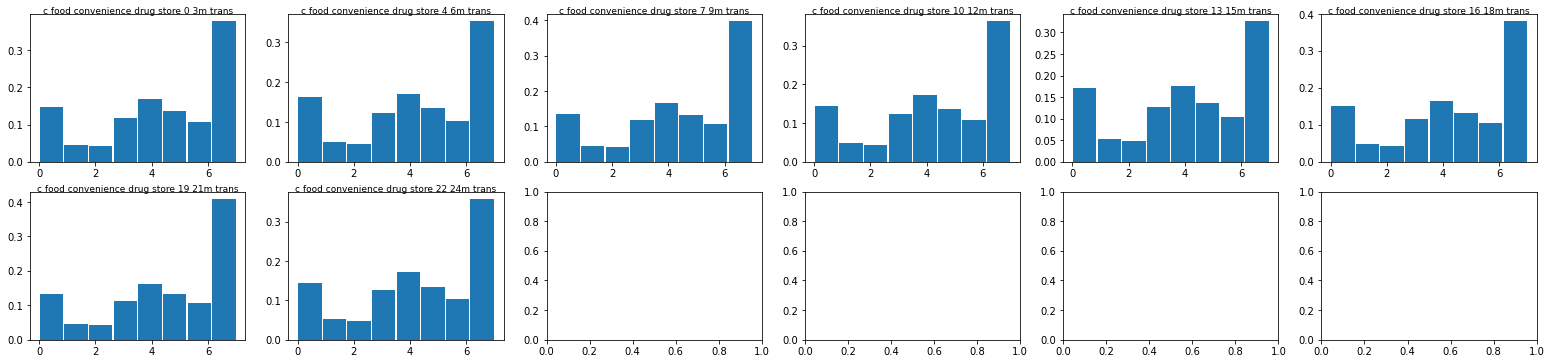

In [0]:
pd_samp = df_food_trans.sample(0.1).toPandas()
feature_names = pd_samp.columns
feature_count = len(feature_names)
 
# determine required rows and columns for visualizations
column_count = 6
row_count = math.ceil(feature_count / column_count)
 
# configure figure layout
fig, ax = plt.subplots(row_count, column_count, figsize =(column_count * 4.5, row_count * 3))
 
# render distribution of each feature
for k in range(0,feature_count):
  
  # determine row & col position
  col = k % column_count
  row = int(k / column_count)
  
  # set figure at row & col position
  ax[row][col].hist(pd_samp[feature_names[k]], rwidth=0.95, bins= len(pd_samp[feature_names[k]].unique()), density=True)
  ax[row][col].text(x=0.5, y=1, s=feature_names[k].replace('_',' '), fontsize=9, ha='center',transform = ax[row][col].transAxes)
plt.show()

In [0]:
pd_samp = df_food_spend.sample(0.1).toPandas()
feature_names = pd_samp.columns
feature_count = len(feature_names)
 
# determine required rows and columns for visualizations
column_count = 6
row_count = math.ceil(feature_count / column_count)
 
# configure figure layout
fig, ax = plt.subplots(row_count, column_count, figsize =(column_count * 4.5, row_count * 3))
 
# render distribution of each feature
for k in range(0,feature_count):
  
  # determine row & col position
  col = k % column_count
  row = int(k / column_count)
  
  # set figure at row & col position
  ax[row][col].hist(pd_samp[feature_names[k]], rwidth=0.95, bins= len(pd_samp[feature_names[k]].unique()), density=True)
  ax[row][col].text(x=0.5, y=1, s=feature_names[k].replace('_',' '), fontsize=9, ha='center',transform = ax[row][col].transAxes)
plt.show()

/databricks/spark/python/pyspark/sql/pandas/conversion.py:145: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true, but has reached the error below and can not continue. Note that 'spark.sql.execution.arrow.pyspark.fallback.enabled' does not have an effect on failures in the middle of computation.
  An error occurred while calling o534.getResult.
: org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:428)
	at org.apache.spark.security.SocketAuthServer.getResult(SocketAuthServer.scala:107)
	at org.apache.spark.security.SocketAuthServer.getResult(SocketAuthServer.scala:103)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(

---------------------------------------------------------------------------
Py4JJavaError                             Traceback (most recent call last)
<command-612616128117909> in <module>
----> 1 pd_samp = df_food_spend.sample(0.1).toPandas()
      2 feature_names = pd_samp.columns
      3 feature_count = len(feature_names)
      4 
      5 # determine required rows and columns for visualizations

/databricks/spark/python/pyspark/databricks/utils/instrumentation.py in wrapper(self, *args, **kwargs)
     40         try:
     41             start_time = time.time()
---> 42             return_val = func(self, *args, **kwargs)
     43         except Exception as e:
     44             duration = (time.time() - start_time) * 1000

/databricks/spark/python/pyspark/sql/pandas/conversion.py in toPandas(self)
    114                     # Rename columns to avoid duplicated column names.
    115                     tmp_column_names = ['col_{}'.format(i) for i in range(len(self.columns))]
--> 1

In [0]:
pd_samp = df_restaurant.sample(0.1).toPandas()
feature_names = pd_samp.columns
feature_count = len(feature_names)
 
# determine required rows and columns for visualizations
column_count = 6
row_count = math.ceil(feature_count / column_count)
 
# configure figure layout
fig, ax = plt.subplots(row_count, column_count, figsize =(column_count * 4.5, row_count * 3))
 
# render distribution of each feature
for k in range(0,feature_count):
  
  # determine row & col position
  col = k % column_count
  row = int(k / column_count)
  
  # set figure at row & col position
  ax[row][col].hist(pd_samp[feature_names[k]], rwidth=0.95, bins= len(pd_samp[feature_names[k]].unique()), density=True)
  ax[row][col].text(x=0.5, y=1, s=feature_names[k].replace('_',' '), fontsize=9, ha='center',transform = ax[row][col].transAxes)
plt.show()

In [0]:
%sql
select *
from df2
limit 10

## Sub-Categories for Food-Convenience-Drug Store & restaurant

In [0]:
sc_convenience_stores = [col for col in df2.columns if col.startswith('sc_convenience_stores')]
sc_drug_stores = [col for col in df2.columns if col.startswith('sc_drug_stores')]
sc_food_delivery = [col for col in df2.columns if col.startswith('sc_food_delivery')]
sc_supermarket = [col for col in df2.columns if col.startswith('sc_supermarket')]

sc_casual_dining = [col for col in df2.columns if col.startswith('sc_casual_dining')]
sc_fast_casual = [col for col in df2.columns if col.startswith('sc_fast_casual')]
sc_fine_dining = [col for col in df2.columns if col.startswith('sc_fine_dining')]
sc_quick_serve = [col for col in df2.columns if col.startswith('sc_quick_serve')]

sc_food = sc_convenience_stores + sc_drug_stores + sc_food_delivery + sc_supermarket
sc_restaurant = sc_casual_dining + sc_fast_casual + sc_fine_dining + sc_quick_serve

df_sc_food = df2.select(sc_food)
df_sc_restaurant = df2.select(sc_restaurant)

In [0]:
display(df_sc_food)

sc_convenience_stores_0_3m_trans,sc_convenience_stores_0_3m_spend,sc_convenience_stores_4_6m_trans,sc_convenience_stores_4_6m_spend,sc_convenience_stores_7_9m_trans,sc_convenience_stores_7_9m_spend,sc_convenience_stores_10_12m_trans,sc_convenience_stores_10_12m_spend,sc_convenience_stores_13_15m_trans,sc_convenience_stores_13_15m_spend,sc_convenience_stores_16_18m_trans,sc_convenience_stores_16_18m_spend,sc_convenience_stores_19_21m_trans,sc_convenience_stores_19_21m_spend,sc_convenience_stores_22_24m_trans,sc_convenience_stores_22_24m_spend,sc_drug_stores_0_3m_trans,sc_drug_stores_0_3m_spend,sc_drug_stores_4_6m_trans,sc_drug_stores_4_6m_spend,sc_drug_stores_7_9m_trans,sc_drug_stores_7_9m_spend,sc_drug_stores_10_12m_trans,sc_drug_stores_10_12m_spend,sc_drug_stores_13_15m_trans,sc_drug_stores_13_15m_spend,sc_drug_stores_16_18m_trans,sc_drug_stores_16_18m_spend,sc_drug_stores_19_21m_trans,sc_drug_stores_19_21m_spend,sc_drug_stores_22_24m_trans,sc_drug_stores_22_24m_spend,sc_food_delivery_0_3m_trans,sc_food_delivery_0_3m_spend,sc_food_delivery_4_6m_trans,sc_food_delivery_4_6m_spend,sc_food_delivery_7_9m_trans,sc_food_delivery_7_9m_spend,sc_food_delivery_10_12m_trans,sc_food_delivery_10_12m_spend,sc_food_delivery_13_15m_trans,sc_food_delivery_13_15m_spend,sc_food_delivery_16_18m_trans,sc_food_delivery_16_18m_spend,sc_food_delivery_19_21m_trans,sc_food_delivery_19_21m_spend,sc_food_delivery_22_24m_trans,sc_food_delivery_22_24m_spend,sc_supermarkets_0_3m_trans,sc_supermarkets_0_3m_spend,sc_supermarkets_4_6m_trans,sc_supermarkets_4_6m_spend,sc_supermarkets_7_9m_trans,sc_supermarkets_7_9m_spend,sc_supermarkets_10_12m_trans,sc_supermarkets_10_12m_spend,sc_supermarkets_13_15m_trans,sc_supermarkets_13_15m_spend,sc_supermarkets_16_18m_trans,sc_supermarkets_16_18m_spend,sc_supermarkets_19_21m_trans,sc_supermarkets_19_21m_spend,sc_supermarkets_22_24m_trans,sc_supermarkets_22_24m_spend
3,5,1,1,4,7,4,8,0,0,1,1,0,0,3,2,4,8,1,1,2,2,3,4,3,3,7,12,4,8,4,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,7,5,27,5,13,4,21,3,11,7,25,4,4,3,7
4,4,5,12,6,7,4,10,4,8,5,9,4,11,3,4,0,0,0,0,1,2,0,0,0,0,1,1,0,0,3,2,0,0,4,9,0,0,0,0,0,0,0,0,0,0,0,0,7,26,7,27,7,25,7,26,5,14,7,28,6,24,7,26
3,2,4,10,2,2,3,2,3,2,3,2,2,1,2,1,4,9,3,5,3,1,4,3,4,2,5,10,5,15,4,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,32,4,8,4,7,5,14,7,16,5,15,4,10,4,13
0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,3,1,4,1,1,1,0,0,0,0,0,0,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,24,7,24,4,14,3,8,5,9,3,6,4,10,3,11
7,10,7,13,6,13,5,11,3,1,5,9,7,19,7,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,21,5,12,7,16,7,25,7,20,7,18,7,22,7,24
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,9,0,0,0,0,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5,3,4,2,2,5,8,2,2,4,9,7,13,3,1,1,1,1,1,0,0,2,1,6,13,3,3,2,2,7,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,19,6,21,5,12,6,22,4,10,4,10,7,30,7,24
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,24,1,8,1,2,5,8,3,4,2,3,1,1,3,10
5,7,5,7,3,3,4,10,6,13,6,9,4,4,5,8,2,9,0,0,4,11,4,8,2,6,4,8,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,11,4,9,4,13,4,14,6,15,4,10,7,21,7,29


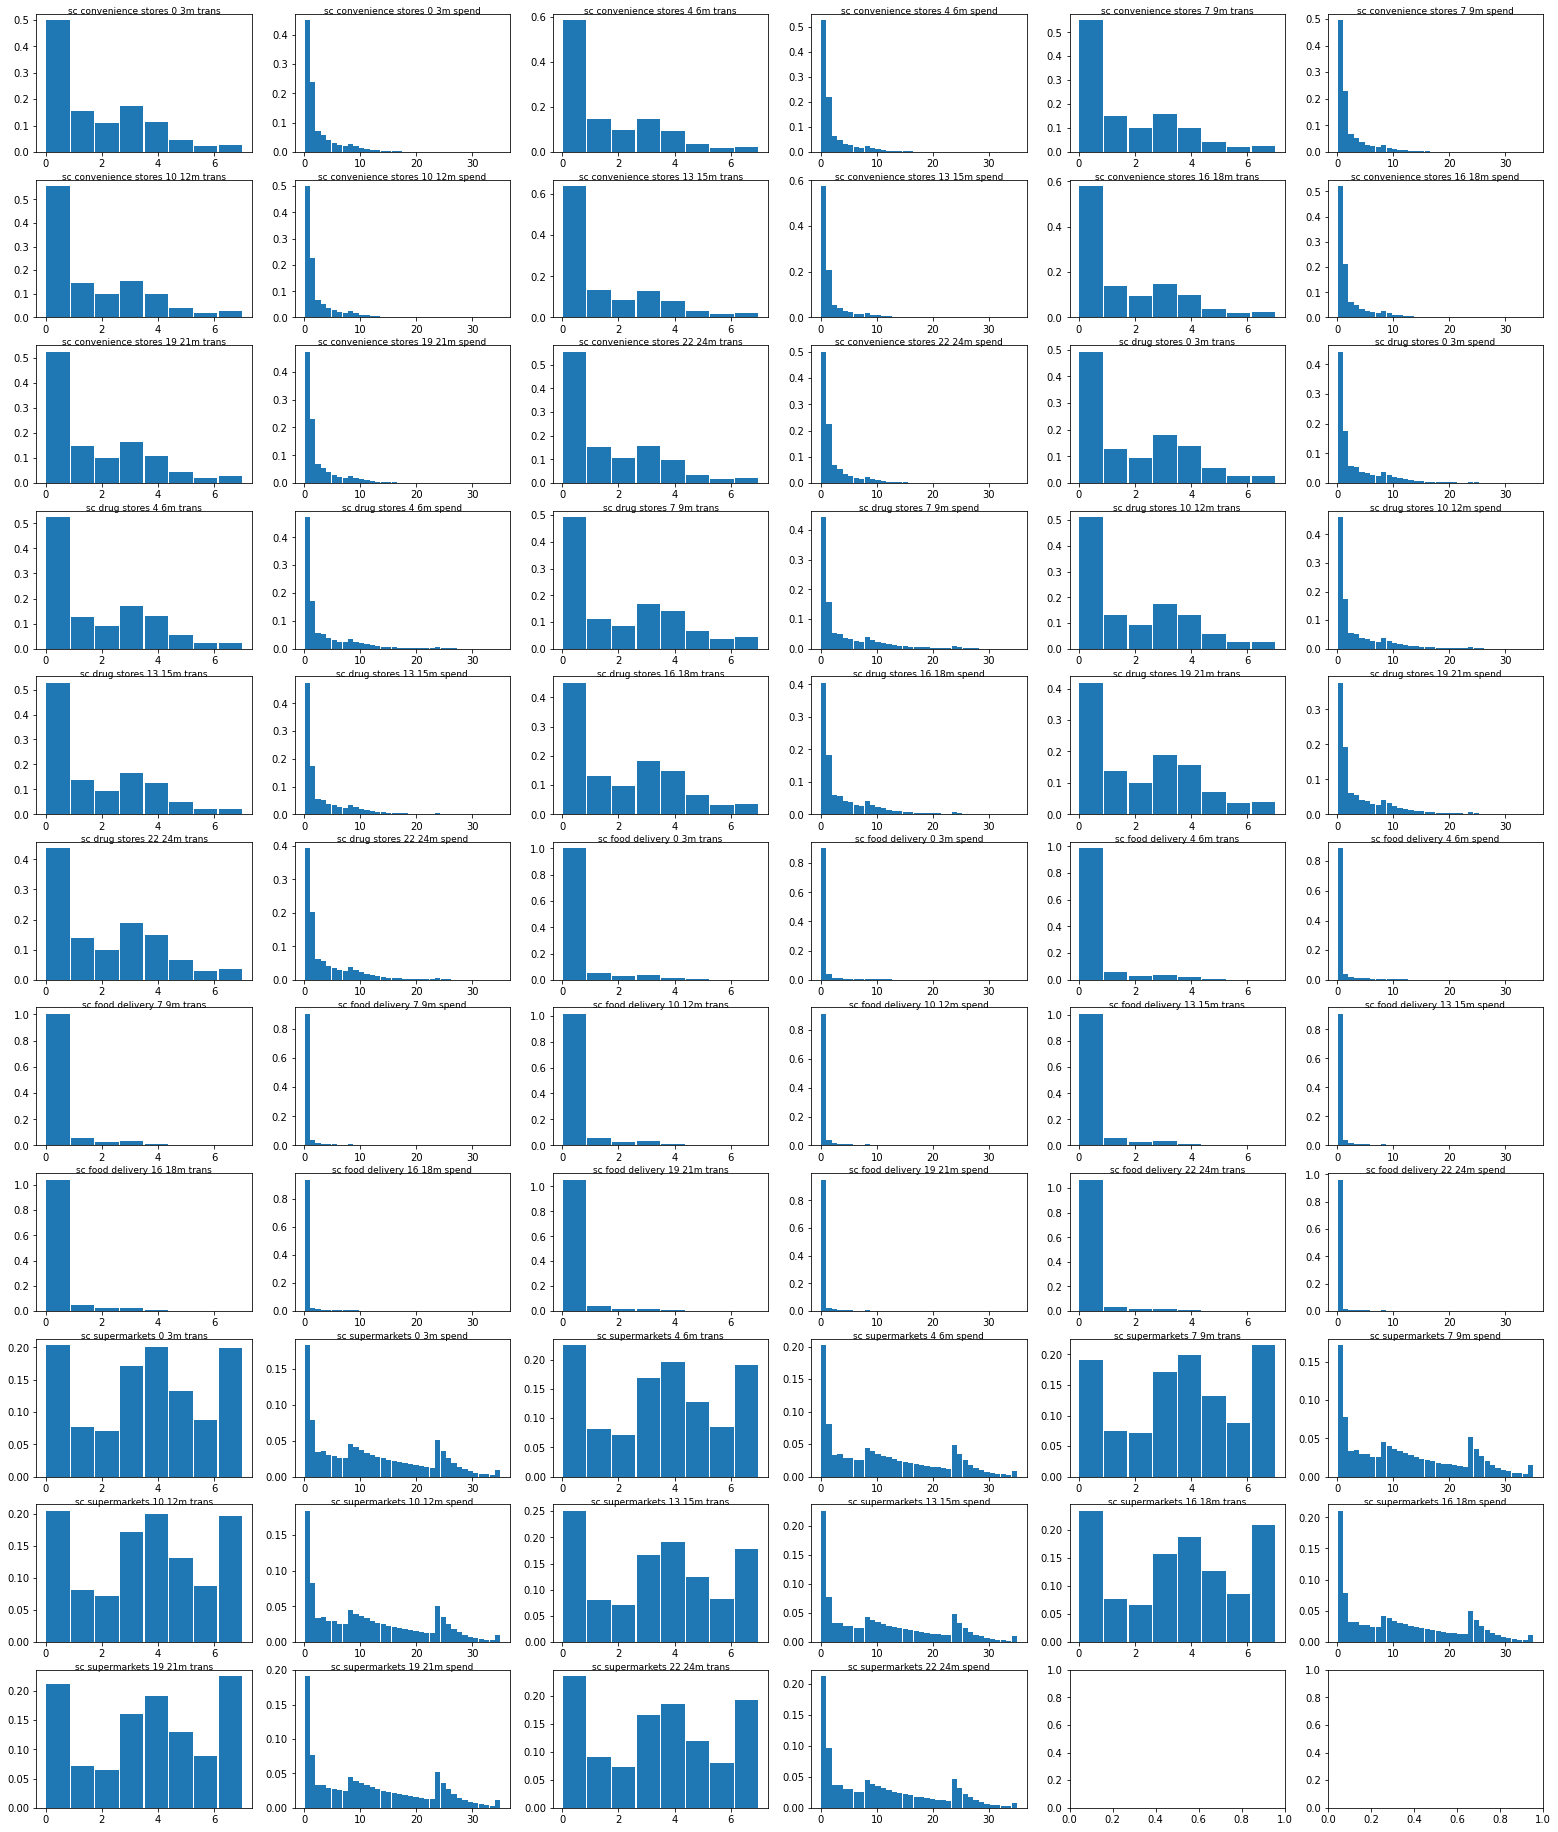

In [0]:
pd_samp = df_sc_food.toPandas()
feature_names = pd_samp.columns
feature_count = len(feature_names)
 
# determine required rows and columns for visualizations
column_count = 6
row_count = math.ceil(feature_count / column_count)
 
# configure figure layout
fig, ax = plt.subplots(row_count, column_count, figsize =(column_count * 4.5, row_count * 3))
 
# render distribution of each feature
for k in range(0,feature_count):
  
  # determine row & col position
  col = k % column_count
  row = int(k / column_count)
  
  # set figure at row & col position
  ax[row][col].hist(pd_samp[feature_names[k]], rwidth=0.95, bins= len(pd_samp[feature_names[k]].unique()), density=True)
  ax[row][col].text(x=0.5, y=1, s=feature_names[k].replace('_',' '), fontsize=9, ha='center',transform = ax[row][col].transAxes)
plt.show()

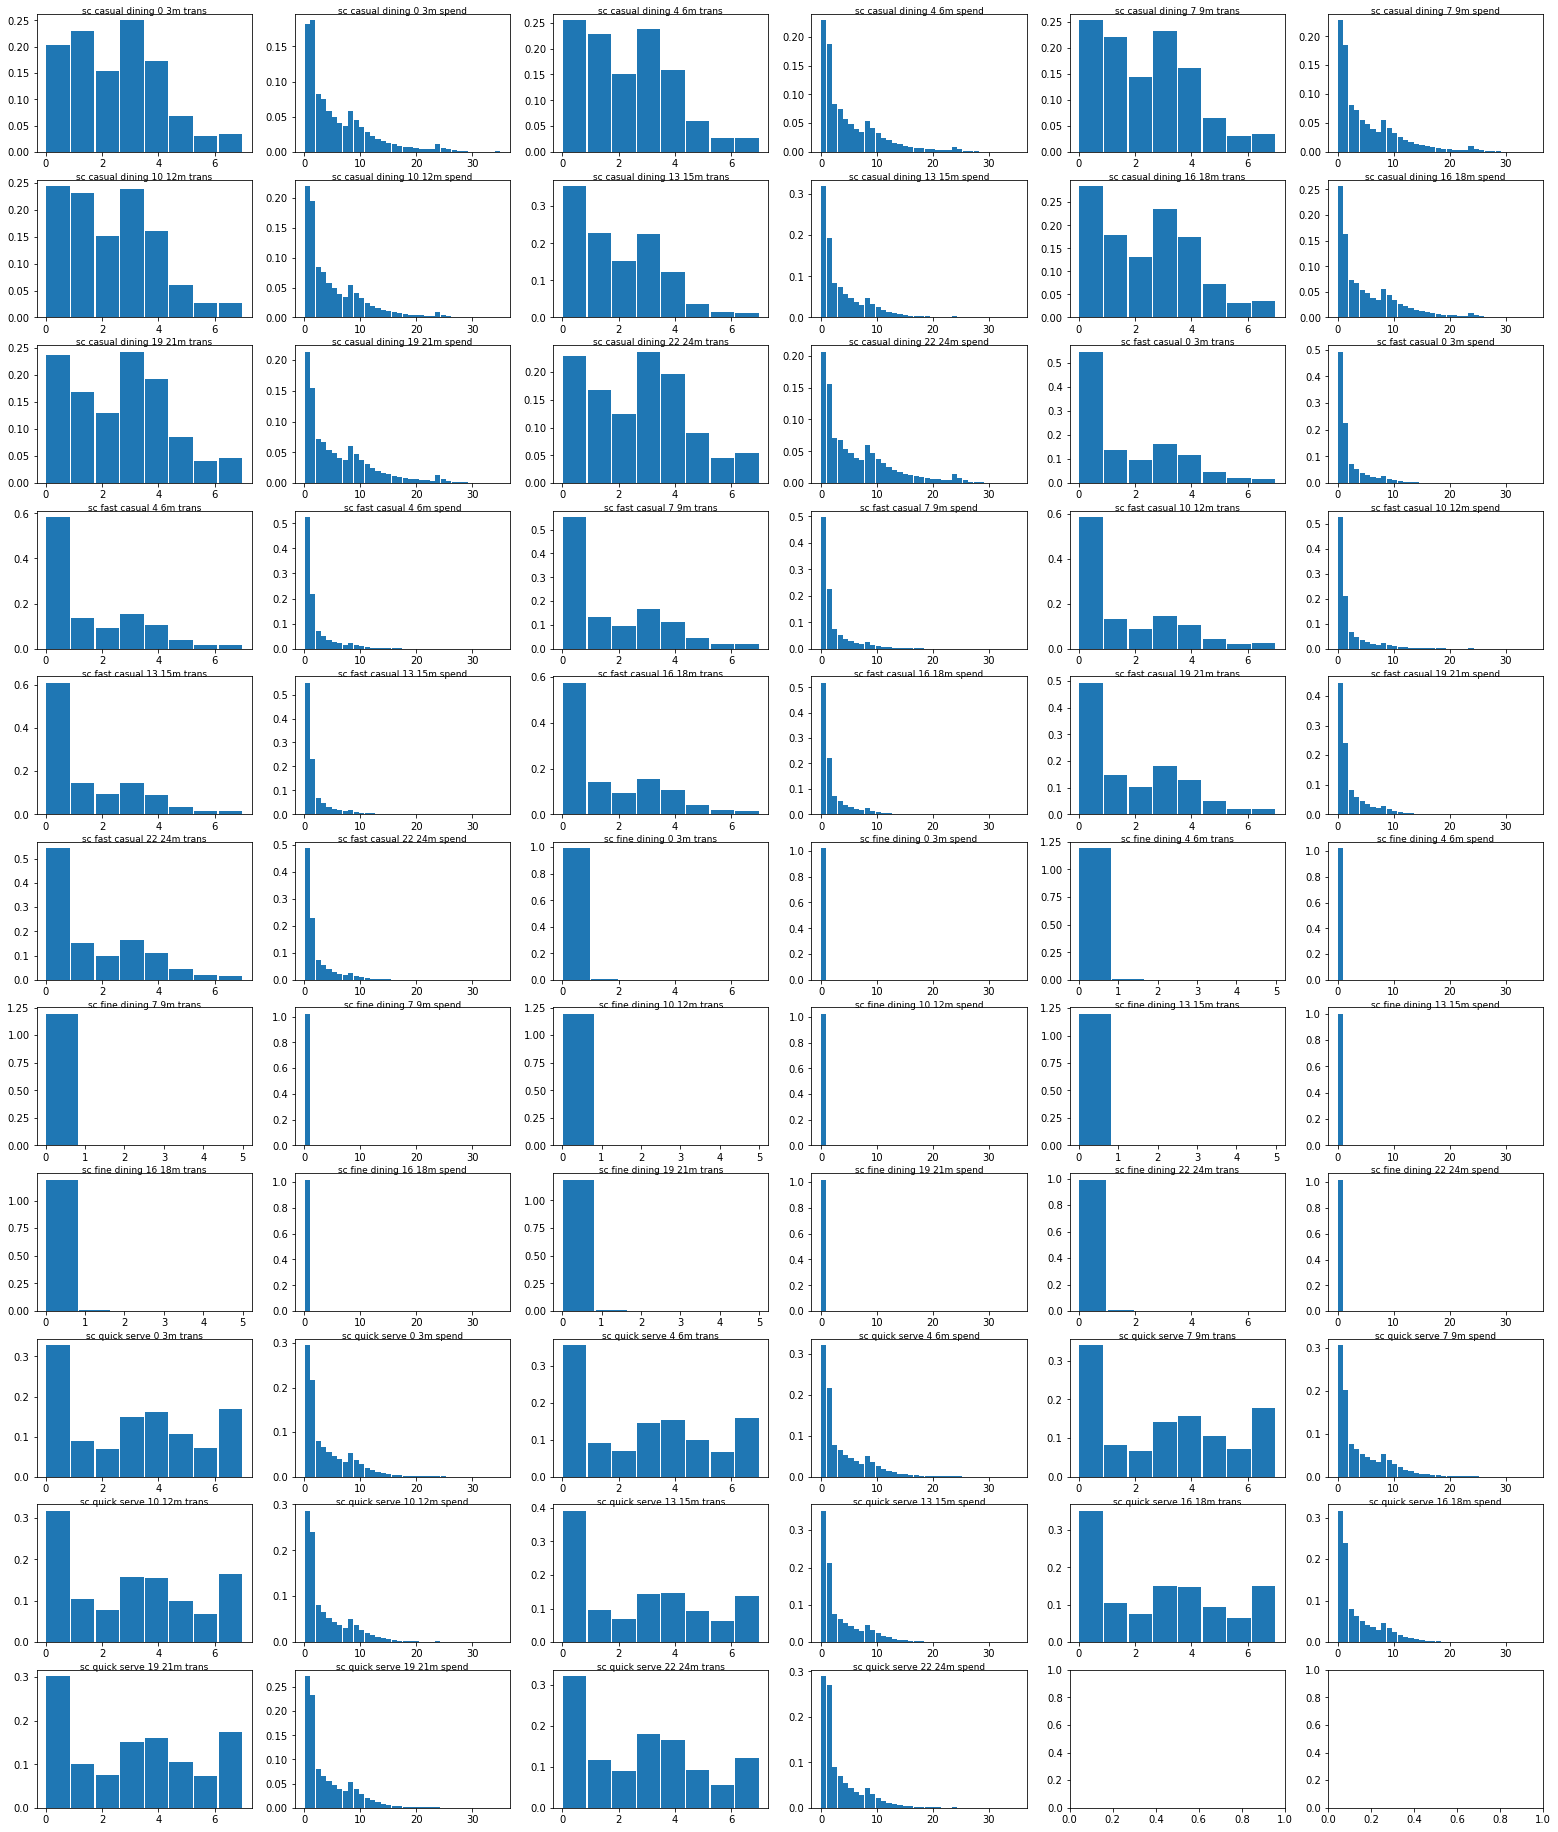

In [0]:
pd_samp = df_sc_restaurant.toPandas()
feature_names = pd_samp.columns
feature_count = len(feature_names)
 
# determine required rows and columns for visualizations
column_count = 6
row_count = math.ceil(feature_count / column_count)
 
# configure figure layout
fig, ax = plt.subplots(row_count, column_count, figsize =(column_count * 4.5, row_count * 3))
 
# render distribution of each feature
for k in range(0,feature_count):
  
  # determine row & col position
  col = k % column_count
  row = int(k / column_count)
  
  # set figure at row & col position
  ax[row][col].hist(pd_samp[feature_names[k]], rwidth=0.95, bins= len(pd_samp[feature_names[k]].unique()), density=True)
  ax[row][col].text(x=0.5, y=1, s=feature_names[k].replace('_',' '), fontsize=9, ha='center',transform = ax[row][col].transAxes)
plt.show()

In [0]:
import pickle
import pandas as pd
import numpy as np
df = pickle.load( open('/dbfs/FileStore/tables/df2_filtered_thresh.pkl', 'rb'))
sparkdf = spark.createDataFrame(df)
display(sparkdf)